# BRAIN TUMOR CLASSIFICATION USING EFFICIENTNET B0

#importing libraries

In [1]:
import os
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import mplcyberpunk
plt.style.use("cyberpunk")
import cv2
import tensorflow as tf
from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import GlobalMaxPooling2D,GlobalAveragePooling2D, Dropout, Dense, BatchNormalization
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau, TensorBoard, ModelCheckpoint
from sklearn.metrics import classification_report,confusion_matrix
from tqdm import tqdm
import random


Importing dataset and preprocessing it

In [2]:
x_train=[]
y_train=[]
labels=['glioma_tumor','no_tumor','meningioma_tumor','pituitary_tumor']
image_size=150
for i in labels:
    folderPath = os.path.join(r'c:\Users\user\OneDrive\Desktop\mp\Training',i)
    for j in tqdm(os.listdir(folderPath)):
        img=cv2.imread(os.path.join(folderPath,j))
        img=cv2.resize(img,(image_size,image_size))
        x_train.append(img)
        y_train.append(i)
for i in labels:
    folderPath = os.path.join(r'c:\Users\user\OneDrive\Desktop\mp\Testing',i)
    for j in tqdm(os.listdir(folderPath)):
        img=cv2.imread(os.path.join(folderPath,j))
        img=cv2.resize(img,(image_size,image_size))
        x_train.append(img)
        y_train.append(i)
#x_train = np.array(x_train)
#y_train = np.array(y_train)
        

  0%|          | 0/826 [00:00<?, ?it/s]

100%|██████████| 74/74 [00:01<00:00, 57.88it/s]


In [3]:
x_train = np.array(x_train)
y_train = np.array(y_train)

In [4]:
a =len(x_train)
print(a)

3264


glioma_tumor
AxesImage(size=(150, 150))


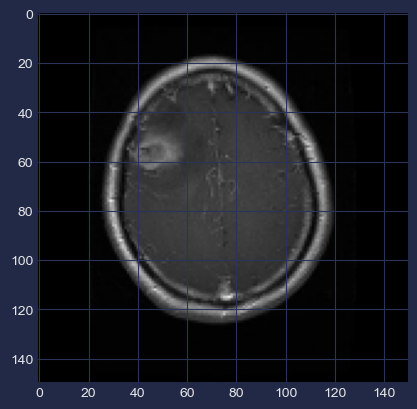

In [5]:
b=random.randint(0,a)
print(y_train[b])
print(plt.imshow(x_train[b]))

In [6]:
label_counts = {label: np.sum(y_train == label) for label in labels}
print(label_counts)

{'glioma_tumor': 926, 'no_tumor': 500, 'meningioma_tumor': 937, 'pituitary_tumor': 901}


Data visualization of label counts 

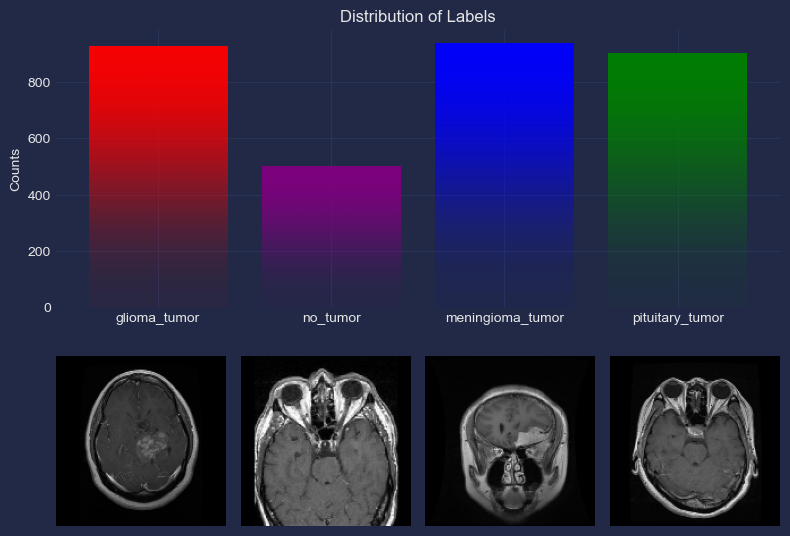

In [7]:
plt.figure(figsize=(8,6))
colors=["red","purple","blue","green"]
plt.subplot(2,1,1)
bars=plt.bar(label_counts.keys(),label_counts.values(),color=colors)
mplcyberpunk.add_bar_gradient(bars=bars)
#plt.xlabel('Types of Tumors')
plt.ylabel('Counts')
plt.title('Distribution of Labels')

k=0
for i in labels:
    j=0
    while True:
        if(y_train[j]==i):
            plt.subplot(2,4,k+5)
            plt.imshow(x_train[j])
            plt.axis('off')
            k+=1
            break
        j+=1
plt.tight_layout()
plt.show()

Shuffling the data

In [8]:
x_train , y_train = shuffle(x_train , y_train , random_state=101)

Splitting the data

In [9]:
x_train , x_test , y_train , y_test = train_test_split(x_train , y_train, test_size=0.2, random_state=101)

In [10]:
y_train_new = [labels.index(i) for i in y_train]
y_test_new = [labels.index(i) for i in y_test]
print(y_train_new[0])

2


One hot encoding

In [11]:
y_train = tf.keras.utils.to_categorical(y_train_new, num_classes=len(labels))
y_test = tf.keras.utils.to_categorical(y_test_new, num_classes=len(labels))
print(y_train[0])

[0. 0. 1. 0.]


In [12]:
print(np.argmax(y_train[0]))

2


Building the deep learning model

In [13]:
# Load the EfficientNetB0 model pretrained on ImageNet without the top layers
efficientnetB0 = tf.keras.applications.EfficientNetB0(weights='imagenet',
                                                      include_top=False,
                                                      input_shape=(image_size, image_size, 3))


# Build the custom model on top of the EfficientNetB0 base
model = efficientnetB0.output
model = tf.keras.layers.GlobalAveragePooling2D()(model)
model = tf.keras.layers.Dense(1024,activation='relu')(model)
model = tf.keras.layers.Dropout(rate=0.4)(model)
model = tf.keras.layers.Dense(4,activation='softmax')(model)
model = tf.keras.models.Model(inputs=efficientnetB0.input, outputs = model)


# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [14]:
model.summary()

Model: "functional_1"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer         │ (None, 150, 150,  │          0 │ -                 │
│ (InputLayer)        │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ rescaling           │ (None, 150, 150,  │          0 │ input_layer[0][0] │
│ (Rescaling)         │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ normalization       │ (None, 150, 150,  │          7 │ rescaling[0][0]   │
│ (Normalization)     │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ rescaling_1         │ (None, 150, 150,  │          0 │ normalization[0]… │
│ (Rescaling)         │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ stem_conv_pad       │ (None, 151, 151,  │          0 │ rescaling_1[0][0] │
│ (ZeroPadding2D)     │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ stem_conv (Conv2D)  │ (None, 75, 75,    │        864 │ stem_conv_pad[0]… │
│                     │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ stem_bn             │ (None, 75, 75,    │        128 │ stem_conv[0][0]   │
│ (BatchNormalizatio… │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ stem_activation     │ (None, 75, 75,    │          0 │ stem_bn[0][0]     │
│ (Activation)        │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block1a_dwconv      │ (None, 75, 75,    │        288 │ stem_activation[… │
│ (DepthwiseConv2D)   │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block1a_bn          │ (None, 75, 75,    │        128 │ block1a_dwconv[0… │
│ (BatchNormalizatio… │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block1a_activation  │ (None, 75, 75,    │          0 │ block1a_bn[0][0]  │
│ (Activation)        │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block1a_se_squeeze  │ (None, 32)        │          0 │ block1a_activati… │
│ (GlobalAveragePool… │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block1a_se_reshape  │ (None, 1, 1, 32)  │          0 │ block1a_se_squee… │
│ (Reshape)           │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block1a_se_reduce   │ (None, 1, 1, 8)   │        264 │ block1a_se_resha… │
│ (Conv2D)            │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block1a_se_expand   │ (None, 1, 1, 32)  │        288 │ block1a_se_reduc… │
│ (Conv2D)            │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block1a_se_excite   │ (None, 75, 75,    │          0 │ block1a_activati… │
│ (Multiply)          │ 32)               │            │ block1a_se_expan… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block1a_project_co… │ (None, 75, 75,    │        512 │ block1a_se_excit

 Total params: 5,365,415 (20.47 MB)

 Trainable params: 5,323,392 (20.31 MB)

 Non-trainable params: 42,023 (164.16 KB)

In [15]:
# ReduceLROnPlateau callback to reduce learning rate if validation accuracy plateaus
reduce_lr = ReduceLROnPlateau(monitor='val_accuracy', factor=0.1, patience=2,
                              min_delta=0.0001, verbose=1)

Training the model

In [16]:
history = model.fit(x_train,y_train,validation_split = 0.1, epochs = 12, verbose = 1,
                    batch_size = 32, callbacks=[reduce_lr])

Epoch 1/12
74/74 ━━━━━━━━━━━━━━━━━━━━ 360s 4s/step - accuracy: 0.7225 - loss: 0.6641 - val_accuracy: 0.4962 - val_loss: 3.5138 - learning_rate: 0.0010
Epoch 2/12
74/74 ━━━━━━━━━━━━━━━━━━━━ 271s 4s/step - accuracy: 0.9145 - loss: 0.2438 - val_accuracy: 0.8931 - val_loss: 0.3540 - learning_rate: 0.0010
Epoch 3/12
74/74 ━━━━━━━━━━━━━━━━━━━━ 390s 5s/step - accuracy: 0.9565 - loss: 0.1300 - val_accuracy: 0.8550 - val_loss: 0.6615 - learning_rate: 0.0010
Epoch 4/12
74/74 ━━━━━━━━━━━━━━━━━━━━ 267s 4s/step - accuracy: 0.9566 - loss: 0.1264 - val_accuracy: 0.9160 - val_loss: 0.2579 - learning_rate: 0.0010
Epoch 5/12
74/74 ━━━━━━━━━━━━━━━━━━━━ 425s 6s/step - accuracy: 0.9735 - loss: 0.0827 - val_accuracy: 0.8969 - val_loss: 0.4483 - learning_rate: 0.0010
Epoch 6/12
74/74 ━━━━━━━━━━━━━━━━━━━━ 0s 11s/step - accuracy: 0.9622 - loss: 0.1215 
Epoch 6: ReduceLROnPlateau reducing learning rate to 0.00010000000474974513.
74/74 ━━━━━━━━━━━━━━━━━━━━ 834s 11s/step - accuracy: 0.9623 - loss: 0.1213 - val_ac

In [17]:
model.save('efficientnetB0.h5')

Plotting the graph for loss and accuracy

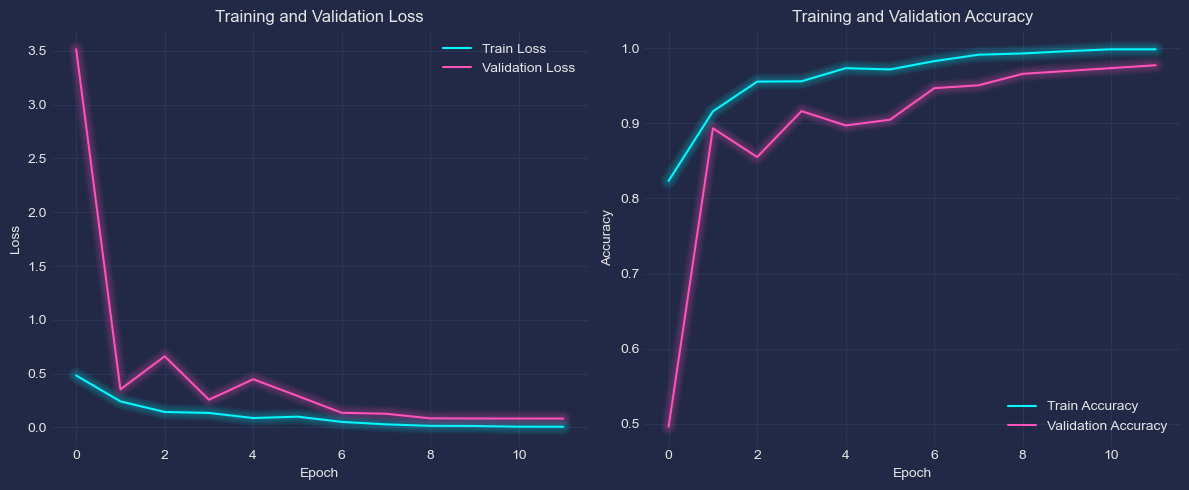

In [18]:
# Plotting training and validation loss
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)
mplcyberpunk.make_lines_glow()

# Plotting training and validation accuracy
plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)
mplcyberpunk.make_lines_glow()

plt.tight_layout()
plt.show()

Confusion matrix

In [19]:
y_true_test = np.argmax(y_test, axis=1)
y_pred_test = np.argmax(model.predict(x_test), axis=1)

conf = confusion_matrix(y_true_test, y_pred_test)

print(f'Confusion matrix:\n{conf}')


21/21 ━━━━━━━━━━━━━━━━━━━━ 28s 761ms/step
Confusion matrix:
[[156   2   9   1]
 [  0 106   2   0]
 [  3   0 195   3]
 [  0   0   0 176]]


Classification Report

In [20]:
print(classification_report(y_true_test,y_pred_test))

              precision    recall  f1-score   support

           0       0.98      0.93      0.95       168
           1       0.98      0.98      0.98       108
           2       0.95      0.97      0.96       201
           3       0.98      1.00      0.99       176

    accuracy                           0.97       653
   macro avg       0.97      0.97      0.97       653
weighted avg       0.97      0.97      0.97       653



In [21]:
x = len(x_test)
print(x)

653


Calculating Confidence value for random dataset

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 258ms/step
Predicted label: meningioma_tumor 
Actual label: meningioma_tumor 
Confidence: 99.99%



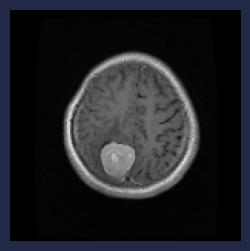

In [22]:
random_index = np.random.randint(0, x)
random_img = x_test[random_index]
predictions = model.predict(random_img.reshape(1, 150, 150, 3))  # Reshape and preprocess the image

# Interpret the model's predictions
predicted_class = np.argmax(predictions)  # Get the index of the class with the highest probability
predicted_label = labels[predicted_class]  # Convert class to label
confidence = predictions[0][predicted_class]

actual_index = y_test[random_index]  # Get the one-hot encoded actual class
actual_class = np.argmax(actual_index)
actual_label = labels[actual_class]

# Display the image and prediction information
print(f"\033[94mPredicted label: {predicted_label}\033[0m \n\033[92mActual label: {actual_label}\033[0m \n\033[93mConfidence: {confidence*100:.2f}%\033[0m\n")
plt.figure(figsize = (3,3))
plt.imshow(random_img)
plt.axis('off')
plt.show()

Testing the Model

In [23]:
test_loss, test_accuracy = model.evaluate(x_test, y_test, verbose=1)
print(f"Test Accuracy: {test_accuracy*100:.2f}%")

21/21 ━━━━━━━━━━━━━━━━━━━━ 11s 503ms/step - accuracy: 0.9676 - loss: 0.1437
Test Accuracy: 96.94%
